<a href="https://colab.research.google.com/github/NDsasuke/Autocorrelation-function-Diagnostics-and-prediction/blob/main/Autocorrelation%20Function/%20Autocorrelation%20Function%20(ACF)%20Fundamentals/Lag_Selection_in_Autocorrelation_Function_(ACF).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Importing Libraries:
   - `import numpy as np`: Imports the NumPy library for numerical operations.
   - `import matplotlib.pyplot as plt`: Imports the Matplotlib library for data visualization.
   


In [10]:
import numpy as np
import matplotlib.pyplot as plt

2. Loading an Online Dataset:
   - The code uses the URL "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv" to load a dataset. It reads the CSV file using `pd.read_csv()` from the pandas library and assigns the "Births" column to the `data` variable.
   


In [11]:
# Load an online dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv"
df = pd.read_csv(url)
data = df["Births"].values

3. Computing Autocorrelation Function (ACF):
   - The `compute_acf()` function calculates the autocorrelation for a given lag.
   - It takes the `data` array and the `lag` as input.
   - The function computes the mean and autocovariance using NumPy functions.
   - For `lag = 0`, it calculates the autocovariance as the sum of squared differences from the mean.
   - For other lags, it calculates the autocovariance as the sum of cross-products of the data with the lagged data.
   - The autocorrelation is then computed by dividing the autocovariance by the appropriate scaling factor.
   - The function returns the autocorrelation value for the given lag.
   


In [12]:
# Function to compute Autocorrelation Function (ACF)
def compute_acf(data, lag):
    n = len(data)
    mean = np.mean(data)
    if lag == 0:
        autocov = np.sum((data - mean) ** 2)
    else:
        autocov = np.sum((data[:-lag] - mean) * (data[lag:] - mean))
    autocorrelation = autocov / ((n - lag) * np.var(data))
    return autocorrelation

4. Computing Autocorrelation Function (ACF):
   - The code sets the maximum lag to 20 using `max_lag = 20`.
   - It calculates the autocorrelation values for lags ranging from 0 to `max_lag` using a list comprehension and the `compute_acf()` function.
   - The autocorrelation values are stored in the `acf_values` list.
   


In [13]:
# Compute Autocorrelation Function (ACF)
max_lag = 20
acf_values = [compute_acf(data, lag) for lag in range(max_lag + 1)]

5. Plotting Autocorrelation Function (ACF):
   - The code creates a new figure with a size of 10x5 using `plt.figure(figsize=(10, 5))`.
   - It plots the ACF using stem plots with the lag values on the x-axis and the autocorrelation values on the y-axis using `plt.stem()`.
   - The parameter `use_line_collection=True` is used for better rendering of stem plots.
   - The x-axis is labeled as "Lag" using `plt.xlabel()`, and the y-axis is labeled as "Autocorrelation" using `plt.ylabel()`.
   - The title of the plot is set as "Autocorrelation Function (ACF)" using `plt.title()`.
   - Gridlines are added to the plot using `plt.grid(True)`.
   - The plot is displayed using `plt.show()`.
   


<ipython-input-14-45d5dc817983>:3: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(max_lag + 1), acf_values, use_line_collection=True)


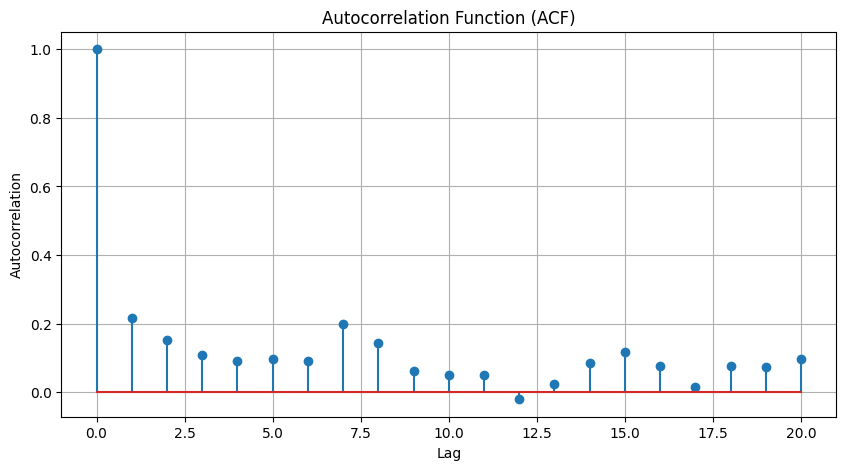

In [14]:
# Plot Autocorrelation Function (ACF)
plt.figure(figsize=(10, 5))
plt.stem(range(max_lag + 1), acf_values, use_line_collection=True)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.grid(True)
plt.show()

6. Method 1: Selecting Lag using the First Significant Negative Autocorrelation:
   - The code uses a list comprehension and the `next()` function to find the first lag where the autocorrelation is negative.
   - If such a lag exists, it assigns the lag value to `first_negative_lag`; otherwise, it assigns `None`.
   - The lag value is printed as "Method 1 - First significant negative autocorrelation at lag: <lag>" using `print()`.
   


In [15]:
# Method 1: Select lag using the first significant negative autocorrelation
first_negative_lag = next((lag for lag, acf in enumerate(acf_values) if acf < 0), None)
print("Method 1 - First significant negative autocorrelation at lag:", first_negative_lag)

Method 1 - First significant negative autocorrelation at lag: 12


7. Method 2: Selecting Lag using Partial Autocorrelation (PACF) and Confidence Interval:
   - The code imports the `plot_pacf()` function from `statsmodels.graphics.tsaplots` to plot the partial autocorrelation function (PACF).
   - It creates a new figure with a size of 10x5 using `plt.figure(figsize=(10, 5))`.
   - The `plot_pacf()` function is called with the `data`, `lags`, and `alpha` parameters to plot the PACF.
   - The x-axis is labeled as "Lag" using `plt.xlabel()`, and the y-axis is labeled as "Partial Autocorrelation" using `plt.ylabel()`.
   - The title of the plot is set as "Partial Autocorrelation Function (PACF)" using `plt.title()`.
   - Gridlines are added to the plot using `plt.grid(True)`.
   - The plot is displayed using `plt.show()`.
   


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1000x500 with 0 Axes>

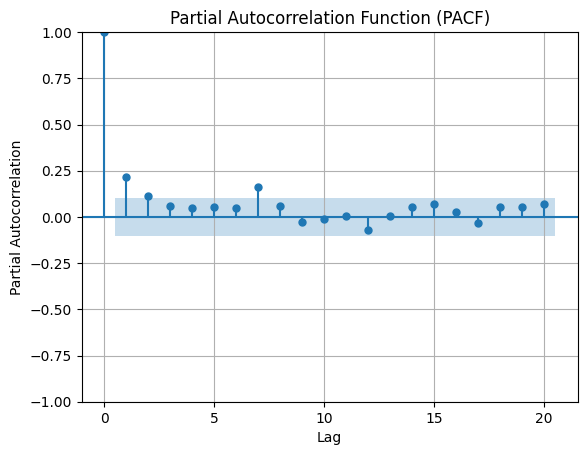

In [16]:
# Method 2: Select lag using partial autocorrelation (PACF) and confidence interval
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(10, 5))
plot_pacf(data, lags=max_lag, alpha=0.05)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.grid(True)
plt.show()

8. Method 3: Selecting Lag using Cutoff Value for Autocorrelation:
   - The code defines a cutoff value for the autocorrelation using `cutoff = 0.2`.
   - It uses a list comprehension and the `next()` function to find the first lag where the absolute value of the autocorrelation is below the cutoff.
   - If such a lag exists, it assigns the lag value to `lag_cutoff`; otherwise, it assigns `None`.
   - The lag value is printed as "Method 3 - Autocorrelation cutoff value at lag: <lag>" using `print()`.



In [17]:
# Method 3: Select lag using cutoff value for autocorrelation
cutoff = 0.2
lag_cutoff = next((lag for lag, acf in enumerate(acf_values) if abs(acf) < cutoff), None)
print("Method 3 - Autocorrelation cutoff value at lag:", lag_cutoff)

Method 3 - Autocorrelation cutoff value at lag: 2
